In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle
from IPython.display import IFrame

%matplotlib inline

In [2]:
disp214 = np.load('214_dispersion.npz')
disp327 = disp214

In [3]:
def set_minors(ax, xtickvals):
    ax.xaxis.set_minor_locator((ticker.FixedLocator((xtickvals[:-1] + xtickvals[1:])/2)))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
def add_label(ax, label, pos='out'):
    if pos == 'out':
        ax.text(-0.05, 1.15, label, transform=ax.transAxes, va='top', ha='right')
    else:
        ax.text(0.08, 0.85, label, transform=ax.transAxes, va='top', ha='left')

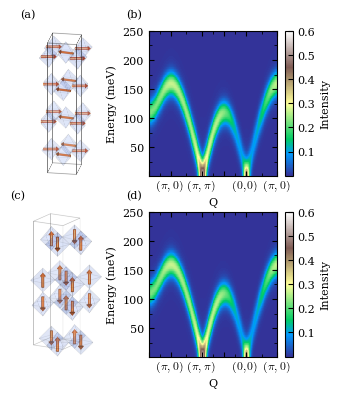

In [4]:
fig = plt.figure(figsize=(3+3/8, 3.7))
gs = GridSpec(2, 2, width_ratios=[0.7, 1])

im = mpl.image.imread('Sr2IrO4_ForMagFigure.png')
ax = plt.subplot(gs[0, 0])
ax.imshow(im)
ax.axis('off')
add_label(ax, '(a)')

im = mpl.image.imread('Sr3Ir2O7_ForMagFigure_Cry.png')
ax = plt.subplot(gs[1, 0])
ax.imshow(im)
ax.axis('off')
add_label(ax, '(c)')

ax = plt.subplot(gs[0, 1])
art = ax.pcolorfast(disp214['x_axis'], disp214['omega_eval'], disp214['I_smooth'], cmap='terrain',
                    vmax=.6)
cb = plt.colorbar(art, ax=ax)
cb.set_label('Intensity')
ax.set_xlabel('Q')
ax.set_ylabel('Energy (meV)')
_ = ax.set_xticks(disp214['ticks'])
_ = ax.set_xticklabels(disp214['label_list'], fontsize=8, usetex=True) # try not to change fontsizes, but making an exception seems unavoidable here
set_minors(ax, disp327['ticks'])
add_label(ax, '(b)')

ax = plt.subplot(gs[1, 1])
art = ax.pcolorfast(disp327['x_axis'], disp327['omega_eval'], disp327['I_smooth'], cmap='terrain',
                vmax=.6)
cb = plt.colorbar(art, ax=ax)
cb.set_label('Intensity')
ax.set_xlabel('Q')
ax.set_ylabel('Energy (meV)')
_ = ax.set_xticks(disp327['ticks'])
_ = ax.set_xticklabels(disp327['label_list'], fontsize=8, usetex=True) # try not to change fontsizes, but making an exception seems unavoidable here
set_minors(ax, disp327['ticks'])
add_label(ax, '(d)')

fig.subplots_adjust(top=0.93, bottom=0.05, left=0.01, wspace=0.2, hspace=0.25)


fig.savefig('ex_14_SWT.pdf', dpi=1200)